# Supervised and Unsupervised Learning Algorithms for Genre Classification and Song Popularity

**<span style="color:CornflowerBlue">by Samantha Garcia, Brainstation Data Science Student (May - August 2022) </span>**

## Notebook 1: Data Investigation and Cleaning

### Table of Contents

    [1. Introduction](#introduction)
        1.1 Background
        1.2 Business Question
        1.3 Project Limitations
        1.4 Future Developments
    
    [2. Data]
        [2.1 Data Source](#datasource)
        [2.2 Data Dictionary](#dictionary)
        [2.3 Spotify Audio Features](#audiofeatures)
    
    [3. Data Loading and Initial investigation](#data)
        [3.1 Import and Initial investigation](#investigation)
        [3.2 Multiclass Classification - Data Requirements](#multiclassrequirements)

    [4. Introduce Supplementary Dataset]
        [4.1 Supplementary Dataset Investigation](#other1)
        [4.2 Combining the Datasets and Investigating Combined Dataframe](#combine)
        [4.3 Clean Combined Dataframe](#cleaning)
        
    [5. Class Balance]
        [5.1 Look at Class Balance in Combined Dataset]
        [5.2 Redress Class Balance]
        [5.3 Export Final Dataframe]
---
        

## 1. Introduction

### 1.1 Background

During the past 5 years, we have seen for the first time, the commoditisation of music as an asset class. Several music investment funds have materialised, even listed on the stock exchange for public trading, exploiting and trading music copyright (as well as, sometimes, the underlying master), in the same way any physical commodity such as gold or oil.

Note that we are primarily focused here on the copyright (which generates music royalties), within the world of muic publishing, as opposed to the Master which is within the realm of the Record Label. More info on that here: https://www.roundhillmusicroyaltyfund.com/resources/music-royalties-explained

#### The two major players in the space are Roundhill Fund Ltd and Hipgnosis Songs Fund Ltd:

https://www.roundhillmusicroyaltyfund.com/resources/music-publishing-market-overview

https://www.hipgnosissongs.com/

Value by genre and vintage is one of the KPIs measured by these investment funds to help shareholders understand the Fund's portfolio mix and value composition. Music consumption (popularity) is one of the key measurement points for understanding a song's value.

https://www.hipgnosissongs.com/case-studies/

Music copyright is a complicated and niche asset class that comes along with a wealth of (very private) data relating to the song's attributes, fanbase, consumption, royalty and ownership metrics, historical revenues and past exploitation. Very little public data is available and is mostly limited to data held on streaming services. Developing useful tools for analysing music as an asset class is therefore still in the hands of the copyright owning companies themselves (music publishers and investment funds).

Song copyrights are acquired by a Fund/Publisher primarily as a collection of songs written by a particular songwriter. These bundles of songs are packaged as a 'Catalogue', and the catalogue is usually sold as a whole collection of songs by a songwriter to a Fund, where the song then individually becomes part of the Fund's portfolio of songs.

Up until this point the song, although separately identifiable as a song, is wrapped up in value within the catalogue - the song's value is tied into that of the Catalogue, and the catalogue is defined by its over-arching genre, geographical popularity, writer's known style, etc.

But investment funds are primarily interested in understanding how the underlying asset fits into it's overall portfolio management. Often, 80% of the value of a catalogue comprising 200+ songs can come from the top 10 or so songs in that catalogue. This means 2 things:

1. The top songs in a catalogue hold identifiable value that needs to be maintained and maximised to return additional value to the acquirer and its shareholders

2. There is a tail of songs with little identifiable value that can be better monetised to create additional value for the acquirer and its shareholders

Once the song, as part of a songwriter's catalogue, lands within its new home, it becomes an individual song that is part of an overall portfolio of assets to be managed effectively to maximise value.

Understanding the asset's attributes and how those attributes impact consumption or usage is key for any investment manager looking to maximise value.

Popularity/ consumption is driven by key themes such as:

- listener demographic
- geography
- song visibility (major services playlisting, film, tv, social media, ads)

Knowing and understanding a song's attributes is key to effectively manage a song's value by placing it in the appropriate channels to maximise exposure to drive audience consumption.

**Exposure to new and existing markets is key - understanding how genre and popularity drive consumption and therefore value, is key to any song manager. In addition, prudent portfolio management requires a diverse portfolio, such as across genres and vintages of songs.**

A | B
- | - 
<img src="../images/hip_portfolio_genre.png" width="400" height="400"> | <img src="../images/hip_portfolio_vintage.png" width="400" height="400">



Taken from pages 8 and 9 of the 2021 Hipgnosis Songs Fund Annual Report: https://www.hipgnosissongs.com/wp-content/uploads/2021/07/HSFL-AR21-web.pdf



Vintage, as well as genre, is directly relevant to a Fund's portfolio management and income profile. More on that later - if time permits, we will obtain song release dates from Spotify and model vintage against consumption, thinking about how that can be combined with our genre modeling.


### 1.2 Business Question

>Can we derive a song's TRUE genre - i.e. by inspecting the song's audio attributes derived by Spotify

Often, songs are given a genre subjectively by music managers' opinion. Developing an in-house model for catgorising genre based on attributes, as well as a popularity measure, can be of value particularly when tailored for use alongside private data held by the song copyright owners.

**We will implement 2 learning algorithms as follows:**

1. a supervised learning model where we tell the algorithm what genres the songs belong to, based on subjective 'human' genre labels


2. an unsupervised learning model where we ask the algorithm to cluster songs based on their attributes, without seeing the songs' existing genre labels

**We will then see what clusters are derived by the unsupervised learning model and deduce:**

1. can we define the song clusters in a way that is understandable to the average human music listener? we can cross reference the cluster outputs from this algorithm against the genre classes from the supervised learning algorithm to deteremine whether the genres are 'natural' genres or not


2. can we attribute song clusters as more or less valuable than others and deduce what song attributes contribute most to song value (based on popularity/ consumption)?

>Can we predict a song's popularity based on its attributes

This is a limited measurement without access to more granular information such as geographical consumption metrics, social media penetration, etc.

We could work on a starter model with a view to further development in the future, given access to this more granular information.

### 1.3 Project Limitations
We appreciate that this project has some limitations which we will address here, and aim to improve on in future iterations:

- limited genre / class examples: we have focused on a select few genres which were available in the datasets found on Kaggle. Nonetheless we believe we have a good variety of genres with fairly wide scope within the type of music that investment funds are primarily interested in i.e. mainstream/ popular music as opposed to genres such as classical music and club music (techno etc) which have slightly more limited scope for monetisation on mainstream platforms (some will disagree, the author  believes there is scoper for wider exploitation of these genres)

- limited access to non-musical features of songs: some of this data is publicly available but a large part of this type of data is largely private and accessible only by the rightsholders or labels. Some examples are:
    - income from 'Synchronisation' i.e. placement of songs in ads, tv, film
    - earnings profiles and consumption statistics by territory
    - etc
    
- ideally we could predict future consumption/price by genre/ cluster, access to half yearly o quarterly earnings is not publicly available for songs/ catalogues


### 1.4 Future Developments

Song vintage (based on release date) is an available additional feature that the author would like to look into as a next step.

Looking at more diverse genres such as EDM, Country, Latin, Disco, Soul, etc may yield better clusters.

Additionally, analysing songs' lyrics alongside audio attributes would be an interesting (albeit time consuming) extension.

There is huge opportunity to develop this model further given access to basic data held privately by copyright owners, utlising datapoints mentioned above.

---

## 2. Data Source and Dictionary

### 2.1 Data Source

This project uses pre-sourced data by a Kaggle user from Spotify, using Spotify's trak audio feature API module.


https://www.kaggle.com/datasets/siropo/spotify-multigenre-playlists-data

https://developer.spotify.com/documentation/web-api/reference/#/



The data came in the form of 7 csv files, one for each genre group totalling 21,336 songs:

- alternative_music_data.csv (1966 songs)
- blues_music_data.csv (1727 songs)
- hiphop_music_data.csv (2024 songs)
- indie_alt_music_data.csv (3608 songs)
- metal_music_data.csv (2575 songs)
- pop_music_data.csv (2938 songs)
- rock_music_data.csv (6498 songs)

Within these genres group each song is labelled within several sub-genres.

**Note that the feature denoting genre derived from Spotify is labelled as the <u>Artist's</u> genre - and here lies the key point mentioned above - songs generally derive their genres as a whole from the artist's genre classification or from the songwriter's catalogue genre classification.**

**We aim to measure genre specifically from a song's own attributes - i.e. its <u>TRUE GENRE</u>.**

This is Spotify's own description of how it assigns gener (source:https://artists.spotify.com/en/help/article/how-genre-charts-work):

"We define genres based on info from listener playlists (title, description, etc.) and our music curation teams. We don't use info from metadata or the playlist pitching tool in Spotify for Artists. We recognize genres constantly evolve and songs can cross different genres."



### 2.2 Data Dictionary

See here for Spotify's own explanation of its 'Get Track Audio Features' API node and the features returned for each track, which directly refer to the columns within this dataset. Also presented in the section below:

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features


Here is the dictionary for the 22 columns in this dataset, which is standard across the 7 csv files:

- **Artist Name:** Band/Artist name
- **Track Name:** Track/Song name
- **Popularity:** Spotify track popularity rating
- **Genres:** Artist's genres
- **Playlist:** Track's playlist of origin
- **danceability:** Spotify audio feature
- **energy:** Spotify audio feature
- **key:** Spotify audio feature
- **loudness:** Spotify audio feature
- **mode:** Spotify audio feature
- **speechiness:** Spotify audio feature
- **acousticness:** Spotify audio feature
- **instrumentalness:** Spotify audio feature
- **liveness:** Spotify audio feature
- **valence:** Spotify audio feature
- **tempo:** Spotify audio feature
- **id:** Unique track ID
- **uri:** track uri
- **track_href:** track url
- **analysis-url:** Spotify audio feature
- **duration-ms:** Song duration in mili-seconds
- **time-signature:** Spotify audio feature

---

### 2.3 Spotify Audio Features

**acousticness**

number
<float>
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

>= 0
<= 1
   

**analysis_url**
   
string
A URL to access the full audio analysis of this track. An access token is required to access this data.

**danceability**
   
number
<float>
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**duration_ms**
    
integer
The duration of the track in milliseconds.

**energy**
    
number
<float>
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**id**
    
string
The Spotify ID for the track.

**instrumentalness**
    
number
<float>
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key**
    
integer
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

>= -1
<= 11
    
    
**liveness**
    
number
<float>
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**
    
number
<float>
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**
    
integer
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**
    
number
<float>
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo**
    
number
<float>
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature**
    
integer
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

>= 3
<= 7
   
**track_href**
   
string
A link to the Web API endpoint providing full details of the track.

**type**
   
string
The object type
   

**uri**
   
string
The Spotify URI for the track.
  
**valence**
   
number
<float>
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

>= 0
<= 1

## 3. Data Loading and Initial investigation

### 3.1 Import and Initial investigation

In [1]:
# import required packages
# packages will be added here as they come up during coding
# this is therefore a complete list of all packages used within this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# filepaths for the 7 csv files
# made up of 'genre group name' and 'music_data' tag

alternative_filepath = 'alternative_music_data.csv'
blues_filepath = 'blues_music_data.csv'
hiphop_filepath = 'hiphop_music_data.csv'
indiealt_filepath = 'indie_alt_music_data.csv'
metal_filepath = 'metal_music_data.csv'
pop_filepath = 'pop_music_data.csv'
rock_filepath = 'rock_music_data.csv'

In [3]:
# create list of csv files
csv_list = [alternative_filepath, blues_filepath, hiphop_filepath, indiealt_filepath, metal_filepath, pop_filepath,\
            rock_filepath]
csv_list

['alternative_music_data.csv',
 'blues_music_data.csv',
 'hiphop_music_data.csv',
 'indie_alt_music_data.csv',
 'metal_music_data.csv',
 'pop_music_data.csv',
 'rock_music_data.csv']

## REDO THE IMPORT SO THAT IT PULLS FROM THE DATA FOLDER BUT STILL IS ABLE TO CREATE THE GENRE TAG ON UPLOAD

In [4]:
# loop through the csv files so that we can add a column for the high level genre grouping on import

data=[]
for i in csv_list:
    song_genres_df = pd.read_csv(i)
    song_genres_df['Genre Group'] = i.split("_music")[0]
    data.append(song_genres_df)

    
all_song_genres_df = pd.concat(data, ignore_index=True) #dont want pandas to try an align row indexes
all_song_genres_df.shape

(26752, 23)

In [5]:
all_song_genres_df

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,Genre Group
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.1350,0.7550,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4,alternative
1,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.5750,0.6220,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4,alternative
2,Foals,On The Luna,51,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,...,0.0804,0.8550,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4,alternative
3,Longpigs,She Said,47,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,...,0.1880,0.5170,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4,alternative
4,Beastie Boys,Sure Shot,57,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,...,0.3010,0.5490,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26747,blink-182,I Miss You,0,"['pop punk', 'punk', 'socal pop punk']",00s Rock Anthems,0.652,0.766,11,-6.481,1,...,0.0739,0.6410,110.011,51fVH5q9apc5HZhWt3G6v9,spotify:track:51fVH5q9apc5HZhWt3G6v9,https://api.spotify.com/v1/tracks/51fVH5q9apc5...,https://api.spotify.com/v1/audio-analysis/51fV...,227813,4,rock
26748,Beloved,Failure On My Lips,37,[],2000s Screamo,0.189,0.972,2,-2.834,0,...,0.2270,0.2140,172.049,7olQs21wmZmKQBuo9liALF,spotify:track:7olQs21wmZmKQBuo9liALF,https://api.spotify.com/v1/tracks/7olQs21wmZmK...,https://api.spotify.com/v1/audio-analysis/7olQ...,276333,4,rock
26749,Saint Louis,Carry Me Away,35,[],Rocktronic,0.286,0.882,7,-2.362,1,...,0.1070,0.0438,139.584,31uuND03OyPbUXLWCmolwj,spotify:track:31uuND03OyPbUXLWCmolwj,https://api.spotify.com/v1/tracks/31uuND03OyPb...,https://api.spotify.com/v1/audio-analysis/31uu...,183214,4,rock
26750,The Smashing Pumpkins,Disarm - Remastered,64,"['alternative metal', 'alternative rock', 'gru...",Rocktail Hour,0.527,0.418,4,-10.205,0,...,0.1390,0.2170,129.517,7A8caPxvrT8ZgLvQPPUCcj,spotify:track:7A8caPxvrT8ZgLvQPPUCcj,https://api.spotify.com/v1/tracks/7A8caPxvrT8Z...,https://api.spotify.com/v1/audio-analysis/7A8c...,196905,4,rock


(array([8747.,    0.,    0., 3831.,    0.,    0., 3045.,    0.,    0.,
           0., 4338.,    0.,    0., 2581.,    0.,    0., 2050.,    0.,
           0., 2160.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

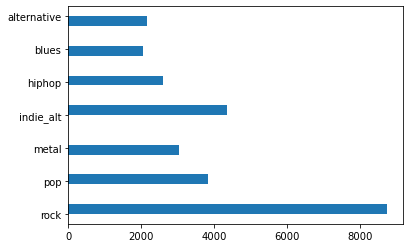

In [6]:
plt.hist(all_song_genres_df['Genre Group'], bins=20, orientation='horizontal')

In [7]:
all_song_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26752 entries, 0 to 26751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       26752 non-null  object 
 1   Track Name        26752 non-null  object 
 2   Popularity        26752 non-null  int64  
 3   Genres            26752 non-null  object 
 4   Playlist          26752 non-null  object 
 5   danceability      26752 non-null  float64
 6   energy            26752 non-null  float64
 7   key               26752 non-null  int64  
 8   loudness          26752 non-null  float64
 9   mode              26752 non-null  int64  
 10  speechiness       26752 non-null  float64
 11  acousticness      26752 non-null  float64
 12  instrumentalness  26752 non-null  float64
 13  liveness          26752 non-null  float64
 14  valence           26752 non-null  float64
 15  tempo             26752 non-null  float64
 16  id                26752 non-null  object

In [8]:
all_song_genres_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,26752.0,46.603544,18.890180,0.00000,34.00000,46.000000,60.0000,100.000
danceability,26752.0,0.551091,0.166505,0.00000,0.43900,0.550000,0.6670,0.989
energy,26752.0,0.698948,0.210743,0.00002,0.55800,0.730000,0.8770,1.000
key,26752.0,5.299604,3.566726,0.00000,2.00000,5.000000,9.0000,11.000
loudness,26752.0,-7.231568,3.312386,-34.82500,-8.80200,-6.599000,-4.9550,1.355
mode,26752.0,0.623131,0.484611,0.00000,0.00000,1.000000,1.0000,1.000
speechiness,26752.0,0.085210,0.087807,0.00000,0.03580,0.050600,0.0913,0.960
acousticness,26752.0,0.186927,0.265412,0.00000,0.00237,0.044450,0.2850,0.996
instrumentalness,26752.0,0.110631,0.246161,0.00000,0.00000,0.000262,0.0334,0.996
liveness,26752.0,0.198308,0.156232,0.01190,0.09730,0.134000,0.2670,0.992


In [9]:
all_song_genres_df.nunique()

Artist Name          9371
Track Name          17239
Popularity            101
Genres               5773
Playlist              347
danceability          904
energy               1034
key                    12
loudness             9209
mode                    2
speechiness          1215
acousticness         4210
instrumentalness     4470
liveness             1487
valence              1323
tempo               15027
id                  18398
uri                 18398
track_href          18398
analysis_url        18398
duration_ms         15000
time_signature          5
Genre Group             7
dtype: int64

In [10]:
all_song_genres_df['Popularity'].unique()

array([ 66,  60,  51,  47,  57,  40,  25,  46,  54,  52,  49,  73,  44,
        53,  56,  14,  68,  27,  35,  36,  67,  38,  37,  32,  58,  79,
        33,  50,  63,  30,  64,  26,  72,  43,  23,  34,  45,  41,  48,
         0,  59,  31,   2,  28,  69,  71,  75,  61,  76,  42,  55,  82,
        16,  62,  74,  39,  85,  19,  29,  65,  70,  24,   6,  17,  22,
        13,  83,  77,  80,  78,   1,   4,   3,  11,  18,  20,  12,  89,
        21,  86,   9,  10,  84,   5,  15,   7,   8,  87,  90,  81,  98,
        88, 100,  97,  96,  92,  93,  94,  95,  99,  91], dtype=int64)

In [11]:
all_song_genres_df['Genres'].unique()

array(["['britpop', 'madchester', 'new wave', 'new wave pop', 'permanent wave', 'pop rock', 'rock']",
       "['modern alternative rock', 'modern rock', 'rock']",
       "['alternative dance', 'indie rock', 'modern alternative rock', 'modern rock', 'new rave', 'oxford indie', 'rock']",
       ...,
       "['album rock', 'classic rock', 'country rock', 'folk rock', 'hard rock', 'mellow gold', 'new wave pop', 'pop rock', 'rock', 'soft rock']",
       "['neo-psychedelic', 'psychedelic soul']",
       "['anime', 'j-metal', 'visual kei']"], dtype=object)

We need to better categorise the songs in the 'alternative' genre group. Let's use the subgenre tags, getting a list of unique subgenre tags to help us identify the actual genre of those songs:

In [12]:
alternative_songs_df = pd.DataFrame(pd.read_csv('alternative_music_data.csv'))
alt_indie_songs_df = pd.DataFrame(pd.read_csv('indie_alt_music_data.csv'))

alt_songs_df = pd.concat([alt_indie_songs_df,alternative_songs_df], ignore_index=True) 
alt_songs_df



,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,tøm hughes,obvious,30,[],Lo-fi Indie,0.626,0.287,5,-19.453,0,...,0.000000,0.2290,0.268,107.815,4CsSN0KzU3bqhkrA7P3kIw,spotify:track:4CsSN0KzU3bqhkrA7P3kIw,https://api.spotify.com/v1/tracks/4CsSN0KzU3bq...,https://api.spotify.com/v1/audio-analysis/4CsS...,189239,4
2,Amnesia Scanner,AS Too Wrong,38,"['art pop', 'deconstructed club', 'escape room...",Terra Incognita,0.568,0.815,2,-5.798,1,...,0.021200,0.3540,0.134,102.023,0rCbNEFbEJPWffx6BmRH9Z,spotify:track:0rCbNEFbEJPWffx6BmRH9Z,https://api.spotify.com/v1/tracks/0rCbNEFbEJPW...,https://api.spotify.com/v1/audio-analysis/0rCb...,254500,4
3,Lisel,In the Dome,13,[],Ambiente,0.317,0.479,2,-10.785,1,...,0.543000,0.0978,0.112,88.383,1WUXUrTgHIYK2F2pb5bvS7,spotify:track:1WUXUrTgHIYK2F2pb5bvS7,https://api.spotify.com/v1/tracks/1WUXUrTgHIYK...,https://api.spotify.com/v1/audio-analysis/1WUX...,176695,4
4,beabadoobee,Worth It,51,"['bedroom pop', 'bubblegrunge', 'indie pop']",Women of Indie,0.576,0.751,2,-5.256,1,...,0.000459,0.0501,0.380,103.009,3r1qdSsvJEwiMKHeCWapMM,spotify:track:3r1qdSsvJEwiMKHeCWapMM,https://api.spotify.com/v1/tracks/3r1qdSsvJEwi...,https://api.spotify.com/v1/audio-analysis/3r1q...,194173,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,The Shins,So Says I,51,"['albuquerque indie', 'alternative rock', 'ind...",Alternative 00s,0.462,0.754,7,-3.361,1,...,0.000000,0.1180,0.475,110.397,6WBNQSfB047hAZ7tusGhqB,spotify:track:6WBNQSfB047hAZ7tusGhqB,https://api.spotify.com/v1/tracks/6WBNQSfB047h...,https://api.spotify.com/v1/audio-analysis/6WBN...,168533,3
6494,Yeah Yeah Yeahs,Gold Lion,54,"['alternative dance', 'alternative rock', 'dan...",Garage Rock Revival,0.521,0.855,9,-3.348,1,...,0.000006,0.0869,0.257,158.744,6tuiDRFaXOBqFLpeTBjAAn,spotify:track:6tuiDRFaXOBqFLpeTBjAAn,https://api.spotify.com/v1/tracks/6tuiDRFaXOBq...,https://api.spotify.com/v1/audio-analysis/6tui...,187133,4
6495,Lianne La Havas,Seven Times - Wu-Lu Remix,53,"['british soul', 'indie soul', 'neo soul', 'po...",Butter,0.679,0.111,6,-28.013,1,...,0.274000,0.3530,0.508,90.014,70loR1tsCdIYX4o6dWgOuz,spotify:track:70loR1tsCdIYX4o6dWgOuz,https://api.spotify.com/v1/tracks/70loR1tsCdIY...,https://api.spotify.com/v1/audio-analysis/70lo...,196000,4
6496,Sløtface,Luminous,27,"['bubblegrunge', 'norwegian indie']",undercurrents,0.426,0.538,10,-8.154,1,...,0.003100,0.0729,0.507,171.693,1zI0GoLfhRFbmDWZJJ2RiL,spotify:track:1zI0GoLfhRFbmDWZJJ2RiL,https://api.spotify.com/v1/tracks/1zI0GoLfhRFb...,https://api.spotify.com/v1/audio-analysis/1zI0...,228507,4


In [13]:
# isolate subgenre tags from the Genres column into unique values in a list (from alt_songs_df only)
alt_genre_tags = []
for x, row in alt_songs_df.iterrows():
    for string in row['Genres'][1:-1].split(', '):
        if string[1:-1] not in alt_genre_tags:
            alt_genre_tags.append(string[1:-1])

In [14]:
# see how many unique subgenres
len(alt_genre_tags)

1144

In [15]:
# look at subgenre tags
alt_genre_tags

['britpop',
 'madchester',
 'new wave',
 'new wave pop',
 'permanent wave',
 'pop rock',
 'rock',
 '',
 'art pop',
 'deconstructed club',
 'escape room',
 'finnish electronic',
 'fluxwork',
 'grimewave',
 'bedroom pop',
 'bubblegrunge',
 'indie pop',
 'chillwave',
 'denver indie',
 'indie rock',
 'indie surf',
 'shimmer pop',
 'alternative dance',
 'modern alternative rock',
 'modern rock',
 'new rave',
 'oxford indie',
 'israeli indie',
 'chamber psych',
 'garage psych',
 'london indie',
 'sheffield indie',
 'alternative rock',
 'east coast hip hop',
 'golden age hip hop',
 'hip hop',
 'old school hip hop',
 'rap',
 'rap rock',
 'future funk',
 'hardvapour',
 'vaporwave',
 'dance-punk',
 'electro house',
 'filter house',
 'ninja',
 'indie soul',
 'uk contemporary r&b',
 'ambient folk',
 'chamber pop',
 'indie folk',
 'garage rock',
 'leicester indie',
 'brooklyn indie',
 'denton tx indie',
 'freak folk',
 'indie garage rock',
 'neo-psychedelic',
 'noise pop',
 'french indie pop',
 'fr

The alternative and alt_indie genre groups could potentially confuse our classfication models as the categories have many similarities with the other genre types and are typically 'alternative' versions of the other genres. Processing these datapoints would require us going through all 6,498 rows that belong to the alternative categories and manually categorising them into one of the other genres.

We will likely drop these in the end, but will keep for now so that we can come back to it if we think of a way to automate the task, or have time to process the category.

Let's take a step back now and think about how our features/ variables would work in context of our business question and the models we would use for genre classification.

---
### 3.2 Multiclass Classification - Data Requirements

Let's think about what data requirements we should impose upon our dataset in light of the algorithms we are implementing and the business question.

We are trying to classify songs into several classes, not a binary class: for example, we are not trying to classify a song as 'Rock' or 'Not Rock', we are attempting to train models to classify songs into a number of genre classes. These classes would ideally have fairly balanced representation in our dataset. This is our data requirement number 1 - class balance within our dataset - see section below for more on that.

We are implementing a supervised learning algorithm as we will be telling our models which genre a song belongs to according to Spotify. Ideally we would also run an unsupervised learning approach in parallel and compare the results, this will be a future add-on to this project.

Our target variable is the Genre Group, which is the column that was added on when importing each csv file and correspond to a high-level genre category given to the songs by the Kaggle user. We are ok with that as we are using listener-perceived genres as a valid categorisation for our model training (Spotify genres are ultiamtely created similarly).

In order to train and validate our models well, before evaluating the models' performance on a test set (which we will put aside from the ,main dataset) we need a high number of songs within each genre class. This is our data requirement number 2 - maximise genre class sample size within our dataset - see section below for more on that.


## CHECK THAT SPOTIFY GENRES ARE INDEED SUBJECTIVE AND NOT DEFINED BY AN ALGORITHM

#### Class balance within our dataset

We would like to build a model that is equally good at classifying any song into a genre. A very imbalanced dataset may make the models less effective at predicting minority classes, as well as overtraining the model in some genres above others. This would make the model very good at classfying some songs but bad at others. 

We would like to make sure that each class is more or less equally represented in our training dataset.

Revisting our dataset, let's look at the csv files that were ingested to see how many songs we have for each genre:

- alternative_music_data.csv (1966 songs)
- blues_music_data.csv (1727 songs)
- hiphop_music_data.csv (2024 songs)
- indie_alt_music_data.csv (3608 songs)
- metal_music_data.csv (2575 songs)
- pop_music_data.csv (2938 songs)
- rock_music_data.csv (6498 songs)

It seems we have around 2000 - 3000 songs for each genre except for 'rock' where we have 6.5k. 'Blues' is a fair bit below the others at 1.7k songs. We should drop some of the rock songs and perhaps lose all of the blues songs (i.e. not train for that genre at all).

#### Maximise genre class sample size within our dataset

Our dataset feels quite small when we consider the number of songs within each genre class. We should enhance our dataset. Further investigation has located another Kaggle dataset that has the same columns of features put together by another user with some similar genre groups. We will now investigate this 'suuplementary' dataset with a view to adding it to our existing dataset.

Let's have a look in the next section.

---

## 4. Supplementary Dataset

### 4.1 Supplementary Dataset Investigation

Let's load our supplementary dataset and investigate the data as we did above in section 3.

In [16]:
# import csv file
suppl_genres_df = pd.read_csv('songs_and_genres_supplementary.csv')
suppl_genres_df.reset_index(drop=True,inplace=True)
suppl_genres_df

C:\Users\smgar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [17]:
suppl_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

(array([2987.,    0., 2999.,    0.,    0., 2956.,    0.,    0., 2975.,
           0.,    0., 2961.,    0.,    0., 2936.,    0.,    0., 2966.,
           0.,    0., 5875.,    0., 1956.,    0.,    0., 2099.,    0.,
           0., 1848.,    0.,    0.,  461.,    0.,    0., 3028.,    0.,
           0., 1680.,    0., 4578.]),
 array([ 0.  ,  0.35,  0.7 ,  1.05,  1.4 ,  1.75,  2.1 ,  2.45,  2.8 ,
         3.15,  3.5 ,  3.85,  4.2 ,  4.55,  4.9 ,  5.25,  5.6 ,  5.95,
         6.3 ,  6.65,  7.  ,  7.35,  7.7 ,  8.05,  8.4 ,  8.75,  9.1 ,
         9.45,  9.8 , 10.15, 10.5 , 10.85, 11.2 , 11.55, 11.9 , 12.25,
        12.6 , 12.95, 13.3 , 13.65, 14.  ]),
 <BarContainer object of 40 artists>)

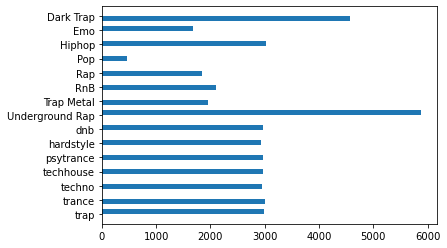

In [18]:
plt.hist(suppl_genres_df['genre'], bins=40, orientation='horizontal')

In [19]:
suppl_genres_df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,42305.0,0.639364,0.156617,0.065100,0.52400,0.64600,0.766,0.988
energy,42305.0,0.762516,0.183823,0.000243,0.63200,0.80300,0.923,1.000
key,42305.0,5.370240,3.666145,0.000000,1.00000,6.00000,9.000,11.000
loudness,42305.0,-6.465442,2.941165,-33.357000,-8.16100,-6.23400,-4.513,3.148
mode,42305.0,0.549462,0.497553,0.000000,0.00000,1.00000,1.000,1.000
speechiness,42305.0,0.136561,0.126168,0.022700,0.04910,0.07550,0.193,0.946
acousticness,42305.0,0.096160,0.170827,0.000001,0.00173,0.01640,0.107,0.988
instrumentalness,42305.0,0.283048,0.370791,0.000000,0.00000,0.00594,0.722,0.989
liveness,42305.0,0.214079,0.175576,0.010700,0.09960,0.13500,0.294,0.988
valence,42305.0,0.357101,0.233200,0.018700,0.16100,0.32200,0.522,0.988


In [20]:
suppl_genres_df.nunique()

danceability          845
energy                895
key                    12
loudness            11360
mode                    2
speechiness          1391
acousticness         4455
instrumentalness     4605
liveness             1640
valence              1620
tempo               15447
type                    1
id                  35877
uri                 35877
track_href          35877
analysis_url        35877
duration_ms         26261
time_signature          4
genre                  15
song_name           15436
Unnamed: 0          20780
title                 132
dtype: int64

Although there are 42,305 rows, there are only 15,436 songs. Let's have a look at the last 2 columns.

In [21]:
suppl_genres_df['Unnamed: 0'].value_counts()

0.0        1
13955.0    1
13973.0    1
13972.0    1
13971.0    1
          ..
6994.0     1
6993.0     1
6992.0     1
6991.0     1
20999.0    1
Name: Unnamed: 0, Length: 20780, dtype: int64

In [22]:
suppl_genres_df['title'].value_counts()

Euphoric Hardstyle               1398
UKF Drum & Bass - All Uploads     907
Top Trance Songs EVER             771
I'm a fucking Headbanger          715
Dark Techno Rave                  680
                                 ... 
Trance List | TOP Trance           18
EDC 2020 Bass Pod                  16
Best New Techno - When We Dip      13
Trap & Bass 2020                   12
HALCYON's 808 BASEMENT             12
Name: title, Length: 132, dtype: int64

Neither column has any useful data for our analysis, we'll drop both. We'll also drop all null song names.

#### Comparing the columns in both dataframes

We will create second version dataframes to make the following changes so that we can retrieve information from dropped columns if necessary.

Going through all_song_genres_df columns:
- Artist Name: not in supplementary dataset, not important for analysis, DROP
- Track Name: 'song_name' in supplementary dataset (either song_name or title depending on row), rename to 'song_name'
- Popularity: not in supplementary dataset, we will look at importing total streams for all songs analysed as a popularity metric instead, DROP
- Genres: these are the sub_genres which we may use at some point, however the supplementary dataset does not have it, DROP
- Playlist: not in supplementary dataset, not important for analysis, DROP
- 'danceability' to 'time_signature': all in both datasets, KEEP AS IS
- Genre Group: this is the genre label we will use as the target, KEEP BUT RENAME TO 'genre'


Going through suppl_genres_df columns:
- 'danceability' to 'tempo': all in both datasets, KEEP AS IS
- type: only 1 unique value in the whole dataset, not important for analysis, DROP
- 'id' to 'time_signature': all in both datasets, KEEP AS IS
- genre: this is the genre label we will use as the target, KEEP AS IS
- song_name: drop null values, same as 'Track Name' in other dataset
- 'Unnamed: 0': DROP, see above
- title: DROP, see above

**Let's enact these changes so that we can join the dataframes:**

In [23]:
# drop columns identified in the first dataframe above
all_song_genres_df.drop(columns=['Artist Name', 'Popularity', 'Genres', 'Playlist'], axis=1, inplace=True)


In [24]:
all_songs_genres_df2 = all_song_genres_df

In [25]:
# rename columns identified in first dataframe above
# drop columns identified in the first dataframe above
all_songs_genres_df2.rename(columns={'Genre Group':'genre', 'Track Name':'song_name'}, inplace=True)
all_songs_genres_df2.head()

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,Laid,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4,alternative
1,In Over My Head,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4,alternative
2,On The Luna,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4,alternative
3,She Said,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4,alternative
4,Sure Shot,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4,alternative


In [26]:
# drop columns identified in the second dataframe above
suppl_genres_df.drop(columns=['type', 'Unnamed: 0', 'title'], axis=1,inplace=True)

In [27]:
suppl_genres_df2 = suppl_genres_df

In [28]:
# look at null values in supplementary dataframe
suppl_genres_df2.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
dtype: int64

In [29]:
# drop null values in supplementary dataframe
suppl_genres_df2.dropna(inplace=True)
suppl_genres_df2.shape

(21519, 19)

In [30]:
# look at null values in original dataset
all_songs_genres_df2.isna().sum()

song_name           0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [31]:
all_songs_genres_df2.shape

(26752, 19)

---
### 4.2 Combining the Datasets and Investigating Combined Dataframe

In [32]:
# join dataframes
final_songs_df = pd.concat([all_songs_genres_df2, suppl_genres_df2], axis=0, join='inner')
final_songs_df.shape

(48271, 19)

In [33]:
# look at final dataframe
final_songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,Laid,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4,alternative
1,In Over My Head,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4,alternative
2,On The Luna,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4,alternative
3,She Said,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4,alternative
4,Sure Shot,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.008540,0.000000,0.1310,0.252,160.299,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop
21521,'94,0.415,0.548,7,-8.563,1,0.2850,0.224000,0.000000,0.1220,0.528,154.272,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop
21522,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.015700,0.001980,0.1000,0.506,184.160,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop
21523,Can't Hold On,0.747,0.832,3,-5.737,0,0.1850,0.233000,0.000014,0.1300,0.733,188.760,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5Ko...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop


In [34]:
# look at columns headers and datatypes
final_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48271 entries, 0 to 21524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         48271 non-null  object 
 1   danceability      48271 non-null  float64
 2   energy            48271 non-null  float64
 3   key               48271 non-null  int64  
 4   loudness          48271 non-null  float64
 5   mode              48271 non-null  int64  
 6   speechiness       48271 non-null  float64
 7   acousticness      48271 non-null  float64
 8   instrumentalness  48271 non-null  float64
 9   liveness          48271 non-null  float64
 10  valence           48271 non-null  float64
 11  tempo             48271 non-null  float64
 12  id                48271 non-null  object 
 13  uri               48271 non-null  object 
 14  track_href        48271 non-null  object 
 15  analysis_url      48271 non-null  object 
 16  duration_ms       48271 non-null  int64 

In [35]:
# look at data distributions
final_songs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,48271.0,0.606143,0.174536,0.00000,0.48400,0.610000,0.7410,0.989
energy,48271.0,0.680360,0.196996,0.00002,0.54500,0.695000,0.8440,1.000
key,48271.0,5.230656,3.624554,0.00000,2.00000,5.000000,8.0000,11.000
loudness,48271.0,-7.145979,3.139388,-34.82500,-8.72100,-6.641000,-4.9960,3.148
mode,48271.0,0.605250,0.488802,0.00000,0.00000,1.000000,1.0000,1.000
speechiness,48271.0,0.126607,0.123377,0.00000,0.04050,0.068600,0.1760,0.960
acousticness,48271.0,0.178169,0.241878,0.00000,0.00679,0.061700,0.2580,0.996
instrumentalness,48271.0,0.095173,0.235781,0.00000,0.00000,0.000029,0.0101,0.996
liveness,48271.0,0.197002,0.154133,0.01190,0.09920,0.132000,0.2600,0.992
valence,48271.0,0.459712,0.236646,0.00000,0.27000,0.451000,0.6400,0.986


In [36]:
# look at number of unique values in each column
final_songs_df.nunique()

song_name           30908
danceability          924
energy               1065
key                    12
loudness            11621
mode                    2
speechiness          1399
acousticness         4484
instrumentalness     4989
liveness             1587
valence              1554
tempo               24557
id                  36203
uri                 36203
track_href          36203
analysis_url        36203
duration_ms         25858
time_signature          5
genre                  15
dtype: int64

---
### 4.3 Clean Combined Dataframe

The column datatypes all look good.

Looking at nunique it looks like there are duplicate values that need to be removed - despite having 48,271 rows in total, there are only 36,203 unique track ids. There are 30,908 unique song names but some tracks with different ids could have the same name and be different songs.

Let's drop rows with duplicate id.

In [37]:
final_songs_df.drop_duplicates(subset=['id'], inplace=True)
final_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36203 entries, 0 to 21523
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         36203 non-null  object 
 1   danceability      36203 non-null  float64
 2   energy            36203 non-null  float64
 3   key               36203 non-null  int64  
 4   loudness          36203 non-null  float64
 5   mode              36203 non-null  int64  
 6   speechiness       36203 non-null  float64
 7   acousticness      36203 non-null  float64
 8   instrumentalness  36203 non-null  float64
 9   liveness          36203 non-null  float64
 10  valence           36203 non-null  float64
 11  tempo             36203 non-null  float64
 12  id                36203 non-null  object 
 13  uri               36203 non-null  object 
 14  track_href        36203 non-null  object 
 15  analysis_url      36203 non-null  object 
 16  duration_ms       36203 non-null  int64 

We now have one big combined dataframe with no null values and clean columns and rows.

---
## 5. Class Balance

### 5.1 Look at Class Balance in Combined Dataset

Now that we have a combined dataset and have removed duplicates and null values, let's see what our genre classes look like and how balanced the datapoints (songs) are across those classes.

In [38]:
final_songs_df['genre'].value_counts()

rock               4993
Underground Rap    4929
Dark Trap          4561
metal              2604
pop                2549
indie_alt          2489
Hiphop             2216
hiphop             2026
alternative        1983
RnB                1846
blues              1754
Emo                1467
Rap                1249
Trap Metal         1182
Pop                 355
Name: genre, dtype: int64

Some of these genres should be combined and renamed, let's have a look:

- 'Emo' and 'metal' should be combined into 'alt_rock'
- 'Underground Rap' should be combined with 'Rap' into'rap'
- 'Dark Trap' and 'Trap Metal' should be combined into 'trap'
- 'pop' should be combined with 'Pop' into 'pop'
- 'indie_alt' should be combined with 'alternative' into 'alternative'
- 'RnB' should be combined with the 'pop' group as 'pop'
- 'Hiphop' should be combined with 'hipop' as 'hiphop'

This leaves us with 5 genres / classes:

- alt_rock 
- rock
- rap
- trap
- pop
- alternative
- hiphop
- blues

Let's combine them and look at the balance of datapoints after combining.


In [39]:
final_songs_df2 = final_songs_df.replace(to_replace={'Emo':'alt_rock','metal':'alt_rock','Underground Rap':'rap','Rap':'rap','Trap Metal':'trap',\
                                   'Dark Trap':'trap','Pop':'pop','indie_alt':'alternative', 'RnB':'pop',\
                                   'Hiphop':'hiphop'})
final_songs_df2['genre'].value_counts()

rap            6178
trap           5743
rock           4993
pop            4750
alternative    4472
hiphop         4242
alt_rock       4071
blues          1754
Name: genre, dtype: int64

In [40]:
final_songs_df2

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,Laid,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4,alternative
1,In Over My Head,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4,alternative
2,On The Luna,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4,alternative
3,She Said,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4,alternative
4,Sure Shot,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",0.526,0.819,7,-6.728,1,0.2980,0.002060,0.000003,0.3360,0.581,159.910,54v6Kv41W8AKToCb14PmJD,spotify:track:54v6Kv41W8AKToCb14PmJD,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,https://api.spotify.com/v1/audio-analysis/54v6...,281886,4,hiphop
21520,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.008540,0.000000,0.1310,0.252,160.299,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,hiphop
21521,'94,0.415,0.548,7,-8.563,1,0.2850,0.224000,0.000000,0.1220,0.528,154.272,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,hiphop
21522,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.015700,0.001980,0.1000,0.506,184.160,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,hiphop


We identified earlier that the alternative genre needed to be removed or analysed further. Let's remove that genre class, as well as the blues class as it has so fewer values than the other classes.

However, we will keep those classes in for our unsupervised algorithm, so let's rename final_songs_df2 for use in our unsupervised learning algorithm keeping those classes, and create a separate dataframe without those classes for our supervised learning algorithm. 



In [41]:
# create unsupervised songs df and reset index just to be sure
unsupervised_songs_df = final_songs_df2
unsupervised_songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,Laid,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4,alternative
1,In Over My Head,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4,alternative
2,On The Luna,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4,alternative
3,She Said,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4,alternative
4,Sure Shot,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",0.526,0.819,7,-6.728,1,0.2980,0.002060,0.000003,0.3360,0.581,159.910,54v6Kv41W8AKToCb14PmJD,spotify:track:54v6Kv41W8AKToCb14PmJD,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,https://api.spotify.com/v1/audio-analysis/54v6...,281886,4,hiphop
21520,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.008540,0.000000,0.1310,0.252,160.299,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,hiphop
21521,'94,0.415,0.548,7,-8.563,1,0.2850,0.224000,0.000000,0.1220,0.528,154.272,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,hiphop
21522,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.015700,0.001980,0.1000,0.506,184.160,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,hiphop


In [42]:
# index looks weird: final rows don't match with the number of rows in the dataframe's shape
# this is because we've removed rows
# reset index
unsupervised_songs_df.reset_index(drop=True,inplace=True)
unsupervised_songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,Laid,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4,alternative
1,In Over My Head,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4,alternative
2,On The Luna,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4,alternative
3,She Said,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4,alternative
4,Sure Shot,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36198,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",0.526,0.819,7,-6.728,1,0.2980,0.002060,0.000003,0.3360,0.581,159.910,54v6Kv41W8AKToCb14PmJD,spotify:track:54v6Kv41W8AKToCb14PmJD,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,https://api.spotify.com/v1/audio-analysis/54v6...,281886,4,hiphop
36199,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.008540,0.000000,0.1310,0.252,160.299,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,hiphop
36200,'94,0.415,0.548,7,-8.563,1,0.2850,0.224000,0.000000,0.1220,0.528,154.272,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,hiphop
36201,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.015700,0.001980,0.1000,0.506,184.160,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,hiphop


(array([4472.,    0.,    0.,    0.,    0., 1754.,    0.,    0.,    0.,
           0.,    0., 4242.,    0.,    0.,    0.,    0.,    0., 4071.,
           0.,    0.,    0.,    0., 4750.,    0.,    0.,    0.,    0.,
           0., 4993.,    0.,    0.,    0.,    0.,    0., 5743.,    0.,
           0.,    0.,    0., 6178.]),
 array([0.   , 0.175, 0.35 , 0.525, 0.7  , 0.875, 1.05 , 1.225, 1.4  ,
        1.575, 1.75 , 1.925, 2.1  , 2.275, 2.45 , 2.625, 2.8  , 2.975,
        3.15 , 3.325, 3.5  , 3.675, 3.85 , 4.025, 4.2  , 4.375, 4.55 ,
        4.725, 4.9  , 5.075, 5.25 , 5.425, 5.6  , 5.775, 5.95 , 6.125,
        6.3  , 6.475, 6.65 , 6.825, 7.   ]),
 <BarContainer object of 40 artists>)

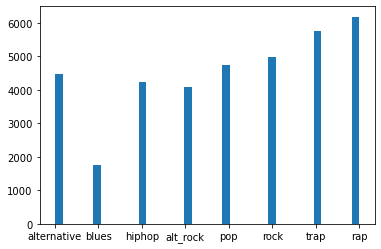

In [54]:
plt.hist(unsupervised_songs_df['genre'], bins=40)

In [43]:
# let's now drop rows belonging to the alternative genre to create supervised_songs_df
# let's also drop the blues genre 
supervised_songs_df = final_songs_df2[~final_songs_df2['genre'].isin(['alternative', 'blues'])]
supervised_songs_df['genre'].value_counts()


rap         6178
trap        5743
rock        4993
pop         4750
hiphop      4242
alt_rock    4071
Name: genre, dtype: int64

In [44]:
# look at dataframe
supervised_songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
3737,Spiral,0.814,0.659,2,-4.475,1,0.0829,0.00155,0.025100,0.568,0.130,88.506,5YaMZfnTGCk6Ze3AxEcoaY,spotify:track:5YaMZfnTGCk6Ze3AxEcoaY,https://api.spotify.com/v1/tracks/5YaMZfnTGCk6...,https://api.spotify.com/v1/audio-analysis/5YaM...,171527,4,hiphop
3738,"SHELTER ft Wyclef Jean, ft Chance The Rapper",0.664,0.660,0,-5.284,1,0.2910,0.18100,0.000002,0.190,0.470,90.106,2nKaHCeL3e5DNl3P7eZ5uo,spotify:track:2nKaHCeL3e5DNl3P7eZ5uo,https://api.spotify.com/v1/tracks/2nKaHCeL3e5D...,https://api.spotify.com/v1/audio-analysis/2nKa...,261467,4,hiphop
3739,Welcome To The Riches (feat. Lil Baby),0.842,0.400,11,-11.308,0,0.4860,0.04570,0.000000,0.172,0.205,130.018,3fcOx9hUmxuj6iGfkLZs3d,spotify:track:3fcOx9hUmxuj6iGfkLZs3d,https://api.spotify.com/v1/tracks/3fcOx9hUmxuj...,https://api.spotify.com/v1/audio-analysis/3fcO...,192052,4,hiphop
3740,Stepney Tale,0.632,0.800,5,-7.227,0,0.2340,0.54700,0.000000,0.147,0.496,92.757,0P90OLiLpljHLYJnqZOK5h,spotify:track:0P90OLiLpljHLYJnqZOK5h,https://api.spotify.com/v1/tracks/0P90OLiLpljH...,https://api.spotify.com/v1/audio-analysis/0P90...,209833,4,hiphop
3741,Fire and Brimstone,0.846,0.511,1,-8.116,1,0.2630,0.03750,0.000005,0.147,0.346,136.964,2lyDT6B5SciPljZUBrNJCu,spotify:track:2lyDT6B5SciPljZUBrNJCu,https://api.spotify.com/v1/tracks/2lyDT6B5SciP...,https://api.spotify.com/v1/audio-analysis/2lyD...,190773,4,hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36198,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.336,0.581,159.910,54v6Kv41W8AKToCb14PmJD,spotify:track:54v6Kv41W8AKToCb14PmJD,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,https://api.spotify.com/v1/audio-analysis/54v6...,281886,4,hiphop
36199,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.131,0.252,160.299,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,hiphop
36200,'94,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.122,0.528,154.272,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,hiphop
36201,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.100,0.506,184.160,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,hiphop


In [45]:
# index looks weird: final rows don't match with the number of rows in the dataframe's shape
# this is because we've removed rows
# reset index
supervised_songs_df.reset_index(drop=True,inplace=True)
supervised_songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,Spiral,0.814,0.659,2,-4.475,1,0.0829,0.00155,0.025100,0.568,0.130,88.506,5YaMZfnTGCk6Ze3AxEcoaY,spotify:track:5YaMZfnTGCk6Ze3AxEcoaY,https://api.spotify.com/v1/tracks/5YaMZfnTGCk6...,https://api.spotify.com/v1/audio-analysis/5YaM...,171527,4,hiphop
1,"SHELTER ft Wyclef Jean, ft Chance The Rapper",0.664,0.660,0,-5.284,1,0.2910,0.18100,0.000002,0.190,0.470,90.106,2nKaHCeL3e5DNl3P7eZ5uo,spotify:track:2nKaHCeL3e5DNl3P7eZ5uo,https://api.spotify.com/v1/tracks/2nKaHCeL3e5D...,https://api.spotify.com/v1/audio-analysis/2nKa...,261467,4,hiphop
2,Welcome To The Riches (feat. Lil Baby),0.842,0.400,11,-11.308,0,0.4860,0.04570,0.000000,0.172,0.205,130.018,3fcOx9hUmxuj6iGfkLZs3d,spotify:track:3fcOx9hUmxuj6iGfkLZs3d,https://api.spotify.com/v1/tracks/3fcOx9hUmxuj...,https://api.spotify.com/v1/audio-analysis/3fcO...,192052,4,hiphop
3,Stepney Tale,0.632,0.800,5,-7.227,0,0.2340,0.54700,0.000000,0.147,0.496,92.757,0P90OLiLpljHLYJnqZOK5h,spotify:track:0P90OLiLpljHLYJnqZOK5h,https://api.spotify.com/v1/tracks/0P90OLiLpljH...,https://api.spotify.com/v1/audio-analysis/0P90...,209833,4,hiphop
4,Fire and Brimstone,0.846,0.511,1,-8.116,1,0.2630,0.03750,0.000005,0.147,0.346,136.964,2lyDT6B5SciPljZUBrNJCu,spotify:track:2lyDT6B5SciPljZUBrNJCu,https://api.spotify.com/v1/tracks/2lyDT6B5SciP...,https://api.spotify.com/v1/audio-analysis/2lyD...,190773,4,hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29972,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.336,0.581,159.910,54v6Kv41W8AKToCb14PmJD,spotify:track:54v6Kv41W8AKToCb14PmJD,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,https://api.spotify.com/v1/audio-analysis/54v6...,281886,4,hiphop
29973,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.131,0.252,160.299,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,hiphop
29974,'94,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.122,0.528,154.272,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,hiphop
29975,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.100,0.506,184.160,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,hiphop


---
### 5.2 Redress the Class Balance

We are only concerned with class balance for the supervised dataset. We can see from the above that the 'rap' and 'trap' classes have a fair few more datapoints/ songs than the other classes. The keep class balance we will aim for 4000-5000 in each class.

We will therefore drop datapoints from both of those classes to bring them down to 5000 datapoints. We want to drop the minimum in order to maximise our dataset.

In [46]:
# drop rows from rap and trap classes
# first create rap and trap dataframes
rap_df = supervised_songs_df[supervised_songs_df['genre'] == 'rap'].tail(5000)
trap_df = supervised_songs_df[supervised_songs_df['genre'] == 'trap'].tail(5000)





In [47]:
# drop rap and trap classes from the supervised dataframe
supervised_songs_df = supervised_songs_df[~supervised_songs_df['genre'].isin(['rap', 'trap'])]
supervised_songs_df['genre'].value_counts()

rock        4993
pop         4750
hiphop      4242
alt_rock    4071
Name: genre, dtype: int64

In [48]:
# add rap and trap dataframes back to the supervised dataframe
supervised_songs_df = pd.concat([supervised_songs_df,rap_df, trap_df], axis=0)
supervised_songs_df['genre'].value_counts()

rap         5000
trap        5000
rock        4993
pop         4750
hiphop      4242
alt_rock    4071
Name: genre, dtype: int64

(array([5000.,    0.,    0.,    0., 4993.,    0.,    0.,    0., 5000.,
           0.,    0.,    0., 4750.,    0.,    0.,    0., 4242.,    0.,
           0., 4071.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

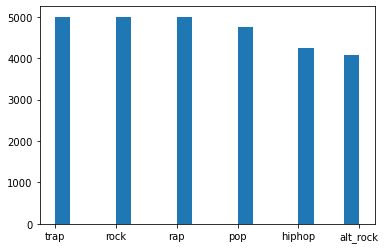

In [49]:
plt.hist(supervised_songs_df['genre'].sort_values(ascending=False),bins=20)

**Class balance is redressed and ready for the next stage of our work.**

In [50]:
# reset index
supervised_songs_df.shape

(28056, 19)

In [51]:
# reset index again
supervised_songs_df.reset_index(drop=True,inplace=True)
supervised_songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,Spiral,0.814,0.659,2,-4.475,1,0.0829,0.001550,0.025100,0.5680,0.130,88.506,5YaMZfnTGCk6Ze3AxEcoaY,spotify:track:5YaMZfnTGCk6Ze3AxEcoaY,https://api.spotify.com/v1/tracks/5YaMZfnTGCk6...,https://api.spotify.com/v1/audio-analysis/5YaM...,171527,4,hiphop
1,"SHELTER ft Wyclef Jean, ft Chance The Rapper",0.664,0.660,0,-5.284,1,0.2910,0.181000,0.000002,0.1900,0.470,90.106,2nKaHCeL3e5DNl3P7eZ5uo,spotify:track:2nKaHCeL3e5DNl3P7eZ5uo,https://api.spotify.com/v1/tracks/2nKaHCeL3e5D...,https://api.spotify.com/v1/audio-analysis/2nKa...,261467,4,hiphop
2,Welcome To The Riches (feat. Lil Baby),0.842,0.400,11,-11.308,0,0.4860,0.045700,0.000000,0.1720,0.205,130.018,3fcOx9hUmxuj6iGfkLZs3d,spotify:track:3fcOx9hUmxuj6iGfkLZs3d,https://api.spotify.com/v1/tracks/3fcOx9hUmxuj...,https://api.spotify.com/v1/audio-analysis/3fcO...,192052,4,hiphop
3,Stepney Tale,0.632,0.800,5,-7.227,0,0.2340,0.547000,0.000000,0.1470,0.496,92.757,0P90OLiLpljHLYJnqZOK5h,spotify:track:0P90OLiLpljHLYJnqZOK5h,https://api.spotify.com/v1/tracks/0P90OLiLpljH...,https://api.spotify.com/v1/audio-analysis/0P90...,209833,4,hiphop
4,Fire and Brimstone,0.846,0.511,1,-8.116,1,0.2630,0.037500,0.000005,0.1470,0.346,136.964,2lyDT6B5SciPljZUBrNJCu,spotify:track:2lyDT6B5SciPljZUBrNJCu,https://api.spotify.com/v1/tracks/2lyDT6B5SciP...,https://api.spotify.com/v1/audio-analysis/2lyD...,190773,4,hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28051,"Going Up, Going Down",0.440,0.628,1,-8.116,1,0.0612,0.360000,0.080500,0.0985,0.124,152.802,53i2IMFPmjukci6LkMautK,spotify:track:53i2IMFPmjukci6LkMautK,https://api.spotify.com/v1/tracks/53i2IMFPmjuk...,https://api.spotify.com/v1/audio-analysis/53i2...,172925,4,trap
28052,Fuck Your Trends,0.732,0.794,2,-6.910,1,0.1050,0.012900,0.658000,0.1200,0.463,151.987,3g6JkGcB3Q6Ve3xbQ2kEVd,spotify:track:3g6JkGcB3Q6Ve3xbQ2kEVd,https://api.spotify.com/v1/tracks/3g6JkGcB3Q6V...,https://api.spotify.com/v1/audio-analysis/3g6J...,191053,4,trap
28053,We're Not the Same,0.291,0.954,8,-4.187,0,0.4650,0.000131,0.019000,0.5010,0.324,180.984,00rOE00OKN8IlG1MQvgHma,spotify:track:00rOE00OKN8IlG1MQvgHma,https://api.spotify.com/v1/tracks/00rOE00OKN8I...,https://api.spotify.com/v1/audio-analysis/00rO...,170342,4,trap
28054,Happy Birthday Bitch,0.582,0.635,0,-8.524,1,0.0388,0.008050,0.000002,0.1000,0.402,114.990,5fqS2yPtGzRNz1Eyau9RZD,spotify:track:5fqS2yPtGzRNz1Eyau9RZD,https://api.spotify.com/v1/tracks/5fqS2yPtGzRN...,https://api.spotify.com/v1/audio-analysis/5fqS...,168690,4,trap


In [52]:
# export dataframeS to data folder
unsupervised_songs_df.to_csv('../data/unsupervised_songs_df.csv')
supervised_songs_df.to_csv('../data/supervised_songs_df.csv')

**In the next notebook we will look at feature selection and transforming our dataset.**